## Name - Deepa Kumari

## KPMG VIRTUAL INTERNSHIP PROJECT

###  The Innovation and Digital Solutions Division
KPMG’s Analytics, Information & Modelling group helps organisations take the mystery out of big data and show them how to leverage their data resources to produce better business outcomes.

## TASK: 1 - Data Quality Assessment
Assessment of data quality and completeness in preparation for analysis.
## TASK: 2 - Data Insights
Targeting high value customers based on customer demographics and attributes.
## TASK: 3 - Data Insights and Presentation
Using Visualisations to present insights.

### Background information on task -
    "Sprocket Central Pty Ltd" , a medium size bikes & cycling accessories organisation, has approached Tony Smith (Partner)     in KPMG’s Lighthouse & Innovation Team. Sprocket Central Pty Ltd is keen to learn more about KPMG’s expertise in its       Analytics, Information & Modelling team.
#### The client provided KPMG with 3 datasets:
**1.Customer Demographic**

**2.Customer Addresses**

**3.Transactions data in the past 3 months**

## Objective
To, review the data quality to ensure that it is ready for our analysis. Remember to take note of any assumptions or issues we need to go back to the client on. As well as recommendations going forward to mitigate current data quality concerns.

Prepare a detailed approach for completing the analysis including activities – i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off. Please advise what steps you would take.

Please ensure your PowerPoint presentation includes a detailed approach for our strategy behind each of the 3 phases including activities involved in each - i.e. understanding the data distributions, feature engineering, data transformations, modelling, results interpretation and reporting. This detailed plan needs to be presented to the client to get a sign-off.
Please develop a dashboard that we can present to the client at our next meeting. Display your data summary and results of the analysis in a dashboard. Maximum of 3 dashboard views/tabs, creativity in layout and presentation is welcome. please find attached a client logo for incorporation.

Specifically, your presentation should specify who Sprocket Central Pty Ltd’s marketing team should be targeting out of the new 1000 customer list as well as the broader market segment to reach out to.

## Resources to help you with the task
### Data Quality Framework Table
__Below is a list of the Data Quality dimensions our team may use to evaluate a dataset. Some of these terms are common to the whole industry, so you may find more information and clarity on these terms by searching online.__

In [1]:
## Filtering out the warnings
import warnings
warnings.filterwarnings ("ignore")

In [2]:
#import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Reading The Data

In [3]:
from pandas import ExcelWriter
from pandas import ExcelFile

In [4]:
path= "C:\\Users\conta\INTERNSHIPS\KPMG internship\KPMG_VI_New_raw_data_update_final.xlsx"
Transaction = pd.read_excel(path,sheet_name="Transactions",header=1)
NewCustomerList = pd.read_excel(path,sheet_name="NewCustomerList",header=1)
CustomerDemographic = pd.read_excel(path,sheet_name="CustomerDemographic",header=1)
CustomerAddress = pd.read_excel(path,sheet_name="CustomerAddress",header=1)

## Explore Transaction Dataset

In [5]:
Transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [6]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [7]:
print("Rows   :" ,Transaction.shape[0])
print("Column :" ,Transaction.shape[1])

Rows   : 20000
Column : 13


In [8]:
Transaction.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [9]:
#convert date columns to datetime
Transaction['product_first_sold_date']=pd.to_datetime(Transaction['product_first_sold_date'], unit='s')
Transaction['product_first_sold_date'].head()

0   1970-01-01 11:27:25
1   1970-01-01 11:35:01
2   1970-01-01 10:06:01
3   1970-01-01 10:02:25
4   1970-01-01 11:43:46
Name: product_first_sold_date, dtype: datetime64[ns]

#### Note -
__The values in the **product_first_sold_date** columns are not correct as it shows everything happening the same day at different times. We would need to refer back to the author of the data to seek more clasrification on how the data was collected.__

In [10]:
Transaction.isnull().values.any()

True

In [11]:
Transaction.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

### We drop missing values depending on the objective of our analysis.

In [12]:
Transaction=Transaction[~Transaction['online_order'].isnull()]
Transaction=Transaction[~Transaction['brand'].isnull()]
Transaction=Transaction[~Transaction['product_line'].isnull()]
Transaction=Transaction[~Transaction['product_class'].isnull()]
Transaction=Transaction[~Transaction['product_size'].isnull()]
Transaction=Transaction[~Transaction['standard_cost'].isnull()]
Transaction=Transaction[~Transaction['product_first_sold_date'].isnull()]

In [13]:
Transaction.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19445 non-null  int64         
 1   product_id               19445 non-null  int64         
 2   customer_id              19445 non-null  int64         
 3   transaction_date         19445 non-null  datetime64[ns]
 4   online_order             19445 non-null  float64       
 5   order_status             19445 non-null  object        
 6   brand                    19445 non-null  object        
 7   product_line             19445 non-null  object        
 8   product_class            19445 non-null  object        
 9   product_size             19445 non-null  object        
 10  list_price               19445 non-null  float64       
 11  standard_cost            19445 non-null  float64       
 12  product_first_sold_date  19445 n

In [14]:
#check unique value
Transaction.nunique()

transaction_id             19445
product_id                   101
customer_id                 3492
transaction_date             364
online_order                   2
order_status                   2
brand                          6
product_line                   4
product_class                  3
product_size                   3
list_price                   100
standard_cost                103
product_first_sold_date      100
dtype: int64

In [15]:
col = ["online_order","order_status","brand","product_line","product_class","product_size"]
for i in Transaction[col]:
    print(i)
    print(Transaction[i].value_counts())
    print("\n")

online_order
1.0    9739
0.0    9706
Name: online_order, dtype: int64


order_status
Approved     19273
Cancelled      172
Name: order_status, dtype: int64


brand
Solex             4169
WeareA2B          3245
Giant Bicycles    3244
OHM Cycles        2993
Trek Bicycles     2931
Norco Bicycles    2863
Name: brand, dtype: int64


product_line
Standard    13920
Road         3894
Touring      1213
Mountain      418
Name: product_line, dtype: int64


product_class
medium    13587
high       2952
low        2906
Name: product_class, dtype: int64


product_size
medium    12767
large      3900
small      2778
Name: product_size, dtype: int64




In [16]:
Transaction.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

### All the columns appear to have correct information.

In [17]:
# will add "profit" column. Formulae = List price - Standard Cost
Transaction["profit"]=Transaction["list_price"]-Transaction["standard_cost"]

In [18]:
Transaction.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 11:27:25,17.87
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,1970-01-01 11:35:01,1702.55
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1970-01-01 10:06:01,1544.61
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1970-01-01 10:02:25,817.36
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,1970-01-01 11:43:46,1055.82


In [19]:
Transaction.isnull().values.any()

False

## Explore NewCustomerList Dataset

In [20]:
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.56,0.7000,0.8750,0.743750,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.89,0.8900,1.1125,0.945625,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,1.01,1.0100,1.0100,1.010000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.87,1.0875,1.0875,1.087500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.52,0.5200,0.6500,0.650000,4,4,1.703125


In [21]:
print("Rows   : ",NewCustomerList.shape[0])
print("Column : ",NewCustomerList.shape[1])

Rows   :  1000
Column :  23


In [22]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null   object        
 9   owns_car                             1000 non-null   object        
 10  tenure       

In [23]:
NewCustomerList.nunique()

first_name                              940
last_name                               961
gender                                    3
past_3_years_bike_related_purchases     100
DOB                                     958
job_title                               184
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        1
owns_car                                  2
tenure                                   23
address                                1000
postcode                                522
state                                     3
country                                   1
property_valuation                       12
Unnamed: 16                              71
Unnamed: 17                             132
Unnamed: 18                             183
Unnamed: 19                             321
Unnamed: 20                             324
Rank                                    324
Value                           

In [24]:
col = ["gender","job_industry_category","wealth_segment","deceased_indicator","owns_car","tenure","state","country","property_valuation"]
for i in NewCustomerList[col]:
    print(i)
    print(NewCustomerList[i].value_counts())
    print("\n")

gender
Female    513
Male      470
U          17
Name: gender, dtype: int64


job_industry_category
Financial Services    203
Manufacturing         199
Health                152
Retail                 78
Property               64
IT                     51
Entertainment          37
Argiculture            26
Telecommunications     25
Name: job_industry_category, dtype: int64


wealth_segment
Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64


deceased_indicator
N    1000
Name: deceased_indicator, dtype: int64


owns_car
No     507
Yes    493
Name: owns_car, dtype: int64


tenure
9     79
13    74
11    68
10    63
12    61
7     60
5     60
17    59
15    58
8     55
14    54
16    49
6     45
18    36
4     36
19    34
3     26
21    24
20    22
2     15
22    12
1      8
0      2
Name: tenure, dtype: int64


state
NSW    506
VIC    266
QLD    228
Name: state, dtype: int64


country
Australia    1000
Name: country, dtype: int64

__We drop "U" in gender__

In [25]:
NewCustomerList=NewCustomerList[~(NewCustomerList["gender"]=="U")]


In [26]:
NewCustomerList.gender.value_counts()

Female    513
Male      470
Name: gender, dtype: int64

In [27]:
# We drop unwanted columns 'Unnamed Column'
col=['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','Rank','Value']
NewCustomerList.drop(col,axis=1,inplace=True)

In [28]:
NewCustomerList.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                      0
job_title                              105
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
dtype: int64

In [29]:
NewCustomerList.duplicated().sum()

0

In [30]:
NewCustomerList.DOB

0     1957-07-12
1     1970-03-22
2     1974-08-28
3     1979-01-28
4     1965-09-21
         ...    
995   1959-10-07
996   2001-10-17
997   1954-10-05
998   1952-12-17
999   1955-10-02
Name: DOB, Length: 983, dtype: datetime64[ns]

In [31]:
NewCustomerList['year']=pd.DatetimeIndex(NewCustomerList["DOB"]).year
NewCustomerList['month']=pd.DatetimeIndex(NewCustomerList["DOB"]).month
NewCustomerList["Age"]= 2021-NewCustomerList["year"]
NewCustomerList.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,year,month,Age
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,QLD,Australia,6,1957,7,64
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,NSW,Australia,11,1970,3,51
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,VIC,Australia,5,1974,8,47
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,5,207 Annamark Plaza,4814,QLD,Australia,1,1979,1,42
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,19,115 Montana Place,2093,NSW,Australia,9,1965,9,56


In [32]:
NewCustomerList[NewCustomerList.Age>90]

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,year,month,Age


In [33]:
NewCustomerList.state.value_counts()

NSW    499
VIC    258
QLD    226
Name: state, dtype: int64

In [34]:
NewCustomerList['state']=NewCustomerList['state'].replace(["NSW"],"New South Wales")
NewCustomerList['state']=CustomerAddress['state'].replace(["VIC"],'Victoria')
NewCustomerList.state.value_counts()

NSW                463
Victoria           243
QLD                191
New South Wales     86
Name: state, dtype: int64

## Explore CustomerDemographic Dataset

In [35]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [36]:
CustomerDemographic.drop("default",axis=1,inplace=True)

In [37]:
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0


In [38]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [39]:
print("Rows   :",CustomerDemographic.shape[0])
print("Column :",CustomerDemographic.shape[1])

Rows   : 4000
Column : 12


In [40]:
CustomerDemographic.describe()

,customer_id,past_3_years_bike_related_purchases,tenure
count,4000.000000,4000.000000,3913.000000
mean,2000.500000,48.890000,10.657041
std,1154.844867,28.715005,5.660146
min,1.000000,0.000000,1.000000
25%,1000.750000,24.000000,6.000000
50%,2000.500000,48.000000,11.000000
75%,3000.250000,73.000000,15.000000
max,4000.000000,99.000000,22.000000


In [41]:
CustomerDemographic.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

### **We decide to drop missing values depending on the objective of our analysis.**

__Not droping the null values present in Last Name Column as the concerend row has first name which is more than sufficient__

In [42]:
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

In [43]:
CustomerDemographic=CustomerDemographic[~CustomerDemographic["DOB"].isnull()]
CustomerDemographic=CustomerDemographic[~CustomerDemographic["job_title"].isnull()]
CustomerDemographic=CustomerDemographic[~CustomerDemographic["job_industry_category"].isnull()]
CustomerDemographic=CustomerDemographic[~CustomerDemographic["tenure"].isnull()]
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2865 entries, 0 to 3996
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2865 non-null   int64         
 1   first_name                           2865 non-null   object        
 2   last_name                            2780 non-null   object        
 3   gender                               2865 non-null   object        
 4   past_3_years_bike_related_purchases  2865 non-null   int64         
 5   DOB                                  2865 non-null   datetime64[ns]
 6   job_title                            2865 non-null   object        
 7   job_industry_category                2865 non-null   object        
 8   wealth_segment                       2865 non-null   object        
 9   deceased_indicator                   2865 non-null   object        
 10  owns_car    

In [44]:
CustomerDemographic.nunique()

customer_id                            2865
first_name                             2389
last_name                              2707
gender                                    5
past_3_years_bike_related_purchases     100
DOB                                    2611
job_title                               195
job_industry_category                     9
wealth_segment                            3
deceased_indicator                        2
owns_car                                  2
tenure                                   22
dtype: int64

In [45]:
CustomerDemographic.gender.unique()

array(['F', 'Male', 'Female', 'U', 'Femal'], dtype=object)

In [46]:
CustomerDemographic["gender"]=CustomerDemographic["gender"].replace(["F","Femal"],"Female")
CustomerDemographic["gender"]=CustomerDemographic["gender"].replace(["U"],"Undefined")

In [47]:
CustomerDemographic.gender.unique()

array(['Female', 'Male', 'Undefined'], dtype=object)

In [48]:
CustomerDemographic.gender.value_counts()

Female       1483
Male         1381
Undefined       1
Name: gender, dtype: int64

In [49]:
CustomerDemographic.DOB

0      1953-10-12
1      1980-12-16
2      1954-01-20
8      1973-03-10
9      1988-10-11
          ...    
3992   1974-12-05
3993   1989-04-07
3994   1975-12-12
3995   1975-08-09
3996   2001-07-13
Name: DOB, Length: 2865, dtype: datetime64[ns]

In [50]:
CustomerDemographic['year'] = pd.DatetimeIndex(CustomerDemographic['DOB']).year
CustomerDemographic['month'] = pd.DatetimeIndex(CustomerDemographic['DOB']).month
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953,10
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980,12
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954,1
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1973,3
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,1988,10


In [51]:
CustomerDemographic['Age']=2021-CustomerDemographic['year']
CustomerDemographic.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953,10,68
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980,12,41
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,1954,1,67
8,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,Yes,8.0,1973,3,48
9,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,Yes,20.0,1988,10,33


In [52]:
CustomerDemographic[CustomerDemographic['Age']>=90]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month,Age
33,34,Jephthah,Bachmann,Undefined,59,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,1843,12,178
719,720,Darrel,Canet,Male,67,1931-10-23,Recruiting Manager,Retail,Affluent Customer,N,No,6.0,1931,10,90


### Note:-
``**customer_id - 34**` : Age is coming `**178**` which is not a correct age hence will drop this value.``

In [53]:
CustomerDemographic.drop(33,inplace=True)

In [54]:
CustomerDemographic.gender.value_counts()

Female    1483
Male      1381
Name: gender, dtype: int64

In [55]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2864 entries, 0 to 3996
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2864 non-null   int64         
 1   first_name                           2864 non-null   object        
 2   last_name                            2779 non-null   object        
 3   gender                               2864 non-null   object        
 4   past_3_years_bike_related_purchases  2864 non-null   int64         
 5   DOB                                  2864 non-null   datetime64[ns]
 6   job_title                            2864 non-null   object        
 7   job_industry_category                2864 non-null   object        
 8   wealth_segment                       2864 non-null   object        
 9   deceased_indicator                   2864 non-null   object        
 10  owns_car    

In [56]:
col= ["gender","job_industry_category","wealth_segment","deceased_indicator","owns_car"]
for i in CustomerDemographic[col]:
    print(i)
    print(CustomerDemographic[i].value_counts())
    print("\n")

gender
Female    1483
Male      1381
Name: gender, dtype: int64


job_industry_category
Manufacturing         695
Financial Services    682
Health                543
Retail                305
Property              231
IT                    126
Entertainment         122
Argiculture            99
Telecommunications     61
Name: job_industry_category, dtype: int64


wealth_segment
Mass Customer        1427
High Net Worth        734
Affluent Customer     703
Name: wealth_segment, dtype: int64


deceased_indicator
N    2862
Y       2
Name: deceased_indicator, dtype: int64


owns_car
Yes    1463
No     1401
Name: owns_car, dtype: int64




In [80]:
CustomerDemographic.shape

(2864, 21)

## Explore CustomerAddress

In [57]:
CustomerAddress.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [58]:
CustomerAddress.isnull().values.any()

False

In [59]:
CustomerAddress.nunique()

customer_id           3999
address               3996
postcode               873
state                    5
country                  1
property_valuation      12
dtype: int64

In [60]:
CustomerAddress.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [61]:
col= ["state","country"]
for i in CustomerAddress[col]:
    print(i)
    print(CustomerAddress[i].value_counts())
    print("\n")

state
NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64


country
Australia    3999
Name: country, dtype: int64




In [62]:
CustomerAddress['state']=CustomerAddress['state'].replace(["NSW"],'New South Wales')
CustomerAddress['state']=CustomerAddress['state'].replace(["VIC"],'Victoria')
CustomerAddress['state'].value_counts()

New South Wales    2140
Victoria           1021
QLD                 838
Name: state, dtype: int64

In [81]:
CustomerAddress.shape

(3999, 6)

## Merge of all DataSet

In [63]:
CustomerDemographic.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,year,month,Age
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,1953,10,68
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,1980,12,41


In [64]:
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'year', 'month', 'Age'],
      dtype='object')

In [65]:
CustomerAddress.head(2)

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10


In [66]:
# We need to add 'Customer Id' column to 'CustomerDemogarphy' and 'CustomerAddress''
CustomerDemographic = pd.merge(CustomerDemographic,CustomerAddress,on="customer_id",how="left")
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'year', 'month', 'Age', 'address', 'postcode',
       'state', 'country', 'property_valuation'],
      dtype='object')

In [67]:
CustomerAddress.columns

Index(['customer_id', 'address', 'postcode', 'state', 'country',
       'property_valuation'],
      dtype='object')

In [68]:
CustomerDemographic.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'year', 'month', 'Age', 'address', 'postcode',
       'state', 'country', 'property_valuation'],
      dtype='object')

In [82]:
CustomerDemographic.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,tenure,year,month,Age,address,postcode,state,country,property_valuation,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,11.0,1953,10,68,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,60+
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,16.0,1980,12,41,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0,40-50


In [70]:
CustomerDemographic["age_group"] = pd.cut(CustomerDemographic.Age,[0,30,40,50,60,90],labels=["<30","30-40","40-50","50-60","60+"])
CustomerDemographic.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,tenure,year,month,Age,address,postcode,state,country,property_valuation,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,11.0,1953,10,68,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,60+
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,16.0,1980,12,41,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0,40-50


In [71]:
CustomerDemographic.customer_id.iloc[-1]

3997

#### Now we have to merge the 'NewCustomer' dataset to 'CustomerDemogrphic' dataset but the problem is that NewCustomer dataset have no column for the customer_id so we work on new customer dataset to add the customer_id

As we have to add this data set vertically
So the customer_id will be starts through the end of the demographic datset

In [72]:
NewCustomerList.insert(0,"customer_id",range(3998,3998+len(NewCustomerList)))
NewCustomerList.head(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,year,month,Age
0,3998,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,14,45 Shopko Center,4500,New South Wales,Australia,6,1957,7,64
1,3999,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,16,14 Mccormick Park,2113,New South Wales,Australia,11,1970,3,51
2,4000,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,10,5 Colorado Crossing,3505,QLD,Australia,5,1974,8,47


In [73]:
NewCustomerList.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'year', 'month', 'Age'],
      dtype='object')

In [74]:
#We will do same process with Age group
NewCustomerList["age_group"]=pd.cut(NewCustomerList.Age ,[0,30,40,50,60,90],labels=["<30","30-40","40-50","50-60","60+"])
NewCustomerList.head(2)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,tenure,address,postcode,state,country,property_valuation,year,month,Age,age_group
0,3998,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,...,14,45 Shopko Center,4500,New South Wales,Australia,6,1957,7,64,60+
1,3999,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,...,16,14 Mccormick Park,2113,New South Wales,Australia,11,1970,3,51,50-60


In [75]:
NewCustomerList.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 983 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          983 non-null    int32         
 1   first_name                           983 non-null    object        
 2   last_name                            954 non-null    object        
 3   gender                               983 non-null    object        
 4   past_3_years_bike_related_purchases  983 non-null    int64         
 5   DOB                                  983 non-null    datetime64[ns]
 6   job_title                            878 non-null    object        
 7   job_industry_category                818 non-null    object        
 8   wealth_segment                       983 non-null    object        
 9   deceased_indicator                   983 non-null    object        
 10  owns_car      

In [76]:
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2864 entries, 0 to 2863
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          2864 non-null   int64         
 1   first_name                           2864 non-null   object        
 2   last_name                            2779 non-null   object        
 3   gender                               2864 non-null   object        
 4   past_3_years_bike_related_purchases  2864 non-null   int64         
 5   DOB                                  2864 non-null   datetime64[ns]
 6   job_title                            2864 non-null   object        
 7   job_industry_category                2864 non-null   object        
 8   wealth_segment                       2864 non-null   object        
 9   deceased_indicator                   2864 non-null   object        
 10  owns_car    

__as all columns are same ,so we merge "NewCustomerList" to "CustomerDemographic" Dataset.__

In [77]:
df = pd.concat([CustomerDemographic,NewCustomerList],ignore_index=True,axis=0)
df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,tenure,year,month,Age,address,postcode,state,country,property_valuation,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,11.0,1953,10,68,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,60+
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,16.0,1980,12,41,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0,40-50
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,...,15.0,1954,1,67,NaN,NaN,NaN,NaN,NaN,60+
3,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,...,8.0,1973,3,48,97736 7th Trail,2023.0,New South Wales,Australia,12.0,40-50
4,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,...,20.0,1988,10,33,NaN,NaN,NaN,NaN,NaN,30-40


In [78]:
df.shape

(3847, 21)

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3847 non-null   int64         
 1   first_name                           3847 non-null   object        
 2   last_name                            3733 non-null   object        
 3   gender                               3847 non-null   object        
 4   past_3_years_bike_related_purchases  3847 non-null   int64         
 5   DOB                                  3847 non-null   datetime64[ns]
 6   job_title                            3742 non-null   object        
 7   job_industry_category                3682 non-null   object        
 8   wealth_segment                       3847 non-null   object        
 9   deceased_indicator                   3847 non-null   object        
 10  owns_car    

__Now will merge both data sets i.e **new_customer_lists & customer_demographic**__

In [86]:
df = pd.concat([CustomerDemographic,NewCustomerList],ignore_index=True,sort=False)
df

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,...,tenure,year,month,Age,address,postcode,state,country,property_valuation,age_group
0,1,Laraine,Medendorp,Female,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,...,11.0,1953,10,68,060 Morning Avenue,2016.0,New South Wales,Australia,10.0,60+
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,...,16.0,1980,12,41,6 Meadow Vale Court,2153.0,New South Wales,Australia,10.0,40-50
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,...,15.0,1954,1,67,NaN,NaN,NaN,NaN,NaN,60+
3,9,Mala,Lind,Female,97,1973-03-10,Business Systems Development Analyst,Argiculture,Affluent Customer,N,...,8.0,1973,3,48,97736 7th Trail,2023.0,New South Wales,Australia,12.0,40-50
4,10,Fiorenze,Birdall,Female,49,1988-10-11,Senior Quality Engineer,Financial Services,Mass Customer,N,...,20.0,1988,10,33,NaN,NaN,NaN,NaN,NaN,30-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4825,4976,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,...,9.0,1959,10,62,2 Sloan Way,2200.0,Victoria,Australia,7.0,60+
4826,4977,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,...,6.0,2001,10,20,04 Union Crossing,2196.0,QLD,Australia,10.0,<30
4827,4978,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,...,15.0,1954,10,67,33475 Fair Oaks Junction,4702.0,Victoria,Australia,2.0,60+
4828,4979,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,...,19.0,1952,12,69,57666 Victoria Way,4215.0,QLD,Australia,2.0,60+


__We would assign the new dataframe to customer demographic where we will use one dataframe to capture all the customer information.__

In [87]:
CustomerDemographic = df
CustomerDemographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4830 entries, 0 to 4829
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4830 non-null   int64         
 1   first_name                           4830 non-null   object        
 2   last_name                            4687 non-null   object        
 3   gender                               4830 non-null   object        
 4   past_3_years_bike_related_purchases  4830 non-null   int64         
 5   DOB                                  4830 non-null   datetime64[ns]
 6   job_title                            4620 non-null   object        
 7   job_industry_category                4500 non-null   object        
 8   wealth_segment                       4830 non-null   object        
 9   deceased_indicator                   4830 non-null   object        
 10  owns_car    

### Now we add the 'Transaction' dataset to the "Demographic' data

In [90]:
Transaction_Exciting_Customer = Transaction
Transaction_Exciting_Customer.sort_values("customer_id", ascending=True).head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
93,94,86,1,2017-12-23,0.0,Approved,OHM Cycles,Standard,medium,medium,235.63,125.07,1970-01-01 10:41:22,110.56
5156,5157,47,1,2017-05-11,1.0,Approved,Trek Bicycles,Road,low,small,1720.70,1531.42,1970-01-01 10:30:23,189.28
18969,18970,11,1,2017-03-29,1.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,1970-01-01 09:49:38,509.97
13423,13424,2,1,2017-02-21,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,1970-01-01 10:42:53,17.87
15662,15663,32,1,2017-06-04,1.0,Approved,Giant Bicycles,Standard,medium,medium,642.70,211.37,1970-01-01 11:16:58,431.33


In [91]:
#merge
# columns we want to merge with the transaction data set
col = ["customer_id","gender","past_3_years_bike_related_purchases","job_title","job_industry_category","owns_car","Age","age_group","wealth_segment",
       "postcode","state","country","property_valuation"]

Transaction_Exciting_Customer = pd.merge(Transaction_Exciting_Customer,CustomerDemographic[col],on="customer_id",how="left")

In [92]:
Transaction_Exciting_Customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19444
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19445 non-null  int64         
 1   product_id                           19445 non-null  int64         
 2   customer_id                          19445 non-null  int64         
 3   transaction_date                     19445 non-null  datetime64[ns]
 4   online_order                         19445 non-null  float64       
 5   order_status                         19445 non-null  object        
 6   brand                                19445 non-null  object        
 7   product_line                         19445 non-null  object        
 8   product_class                        19445 non-null  object        
 9   product_size                         19445 non-null  object        
 10  list_price

In [94]:
#making the data in ascending order on  the transection date
Transaction_Exciting_Customer.sort_values("transaction_date",ascending=False).head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,job_title,job_industry_category,owns_car,Age,age_group,wealth_segment,postcode,state,country,property_valuation
10617,10905,0,2659,2017-12-30,0.0,Approved,Solex,Standard,medium,medium,...,Professor,Argiculture,Yes,47.0,40-50,High Net Worth,4151.0,QLD,Australia,4.0
2230,2285,95,3216,2017-12-30,1.0,Approved,Giant Bicycles,Standard,medium,large,...,Database Administrator III,Manufacturing,Yes,23.0,<30,Mass Customer,4390.0,QLD,Australia,7.0
7328,7518,65,3433,2017-12-30,0.0,Approved,WeareA2B,Standard,medium,medium,...,Computer Systems Analyst II,Property,No,23.0,<30,Mass Customer,3174.0,Victoria,Australia,8.0
1008,1033,49,934,2017-12-30,0.0,Approved,Trek Bicycles,Road,medium,medium,...,Human Resources Manager,Manufacturing,No,25.0,<30,Mass Customer,2036.0,New South Wales,Australia,12.0
15799,16258,14,2055,2017-12-30,1.0,Approved,Solex,Standard,high,large,...,Administrative Assistant III,Retail,No,41.0,40-50,High Net Worth,2327.0,New South Wales,Australia,3.0


#### We saw that the transaction_date have all the transaction on same day 2017-12-30 which will be the comparison date

__We will make new columns names as recency= camparison_date - transaction_date__

In [96]:
Transaction_Exciting_Customer["transaction_date"]=pd.to_datetime(Transaction_Exciting_Customer["transaction_date"]).dt.date
Transaction_Exciting_Customer["recency"]=0

In [97]:
Transaction_Exciting_Customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19444
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       19445 non-null  int64         
 1   product_id                           19445 non-null  int64         
 2   customer_id                          19445 non-null  int64         
 3   transaction_date                     19445 non-null  object        
 4   online_order                         19445 non-null  float64       
 5   order_status                         19445 non-null  object        
 6   brand                                19445 non-null  object        
 7   product_line                         19445 non-null  object        
 8   product_class                        19445 non-null  object        
 9   product_size                         19445 non-null  object        
 10  list_price

In [99]:
import datetime

comparison_date = datetime.date(2017, 12, 30)

for i in range(19445):
    if Transaction_Exciting_Customer['transaction_date'][i] == 0:
        pass
    else:
        x = comparison_date - Transaction_Exciting_Customer['transaction_date'][i]
        Transaction_Exciting_Customer["recency"][i] = x.days

### Checking for the null values

In [100]:
Transaction_Exciting_Customer.isnull().sum()

transaction_id                            0
product_id                                0
customer_id                               0
transaction_date                          0
online_order                              0
order_status                              0
brand                                     0
product_line                              0
product_class                             0
product_size                              0
list_price                                0
standard_cost                             0
product_first_sold_date                   0
profit                                    0
gender                                 5379
past_3_years_bike_related_purchases    5379
job_title                              5379
job_industry_category                  5379
owns_car                               5379
Age                                    5379
age_group                              5379
wealth_segment                         5379
postcode                        

In [101]:
Transaction_Exciting_Customer=Transaction_Exciting_Customer[~Transaction_Exciting_Customer["gender"].isnull()]
Transaction_Exciting_Customer.isnull().sum()

transaction_id                          0
product_id                              0
customer_id                             0
transaction_date                        0
online_order                            0
order_status                            0
brand                                   0
product_line                            0
product_class                           0
product_size                            0
list_price                              0
standard_cost                           0
product_first_sold_date                 0
profit                                  0
gender                                  0
past_3_years_bike_related_purchases     0
job_title                               0
job_industry_category                   0
owns_car                                0
Age                                     0
age_group                               0
wealth_segment                          0
postcode                               12
state                             

In [102]:
Transaction_Exciting_Customer=Transaction_Exciting_Customer[~Transaction_Exciting_Customer["postcode"].isnull()]
Transaction_Exciting_Customer.isnull().sum()

transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
order_status                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
profit                                 0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
owns_car                               0
Age                                    0
age_group                              0
wealth_segment                         0
postcode                               0
state                                  0
country         

### What we have done is-

__We have combined all worksheets together for proper analysis.__

__The new datframe is called : transactions_exsistingcustomer__

## Now will be running a RFM Analysis for exsisiting customer
** RFM stands for recency, frequency, and monetary value. The idea is to segment customers based on when their last purchase was, how often they've purchased in the past, and how much they've spent overall.**

In [103]:
Transaction_Exciting_Customer.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,profit,past_3_years_bike_related_purchases,Age,postcode,property_valuation,recency
count,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000,14054.000000
mean,9997.552441,45.613064,1718.680305,0.500356,1110.645960,559.051687,551.594273,49.443290,43.706205,2999.513306,7.469546,181.657962
std,5764.570083,30.492086,1011.286420,0.500018,584.029679,409.094565,493.376642,28.683116,12.572443,859.583893,2.843888,105.541399
min,1.000000,0.000000,1.000000,0.000000,12.010000,7.210000,4.800000,0.000000,19.000000,2000.000000,1.000000,0.000000
25%,5032.250000,18.000000,831.000000,0.000000,575.270000,215.140000,135.850000,25.000000,34.000000,2199.000000,6.000000,89.000000
50%,9979.500000,44.000000,1719.000000,1.000000,1163.890000,507.580000,445.210000,48.000000,44.000000,2768.000000,8.000000,181.000000
75%,14976.750000,72.000000,2593.000000,1.000000,1635.300000,795.100000,827.160000,74.000000,53.000000,3796.000000,10.000000,273.000000
max,20000.000000,100.000000,3497.000000,1.000000,2091.470000,1759.850000,1702.550000,99.000000,90.000000,4883.000000,12.000000,363.000000


#### Only the transactions made in the last 2 years are considered for analysis.

In [105]:
Transaction_Exciting_Customer = Transaction_Exciting_Customer[Transaction_Exciting_Customer["recency"]<730]
Transaction_Exciting_Customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14054 entries, 0 to 19444
Data columns (total 27 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   transaction_id                       14054 non-null  int64         
 1   product_id                           14054 non-null  int64         
 2   customer_id                          14054 non-null  int64         
 3   transaction_date                     14054 non-null  object        
 4   online_order                         14054 non-null  float64       
 5   order_status                         14054 non-null  object        
 6   brand                                14054 non-null  object        
 7   product_line                         14054 non-null  object        
 8   product_class                        14054 non-null  object        
 9   product_size                         14054 non-null  object        
 10  list_price

In [106]:
rfmTable = Transaction_Exciting_Customer.groupby('customer_id').agg({'recency': lambda x:x.min(), 
                                                                      'product_id': lambda x: len(x), 
                                                                      'profit': lambda x: x.sum()})

rfmTable.rename(columns={'recency': 'recency', 
                         'product_id': 'frequency', 
                         'profit': 'monetary_value'}, inplace=True)

In [107]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7,11,3018.09
2,128,3,2226.26
9,78,6,2353.11
12,67,7,3540.03
13,27,7,4337.38


In [108]:
rfmTable["monetary_value"]=rfmTable["monetary_value"].astype(int)

In [109]:
rfmTable.head()

,recency,frequency,monetary_value
customer_id,,,
1,7,11,3018
2,128,3,2226
9,78,6,2353
12,67,7,3540
13,27,7,4337


In [110]:
quartiles=rfmTable.quantile(q=[0,0.25,0.50,0.75,0.99])
print(quartiles,type(quartiles))

      recency  frequency  monetary_value
0.00     0.00       1.00            15.0
0.25    18.00       4.00          1785.5
0.50    45.00       5.00          2799.0
0.75    87.00       7.00          4096.0
0.99   267.79      11.79          8252.0 <class 'pandas.core.frame.DataFrame'>


In [111]:
rfmTable["R_Score"] = 0
rfmTable["F_Score"] = 0
rfmTable["M_Score"] = 0

In [112]:
rfmTable

,recency,frequency,monetary_value,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018,0,0,0
2,128,3,2226,0,0,0
9,78,6,2353,0,0,0
12,67,7,3540,0,0,0
13,27,7,4337,0,0,0
...,...,...,...,...,...,...
3493,93,6,3728,0,0,0
3494,4,4,2755,0,0,0
3495,13,7,3847,0,0,0


### Calculating R score

In [113]:
rfmTable.index

Int64Index([   1,    2,    9,   12,   13,   14,   15,   19,   20,   21,
            ...
            3488, 3489, 3490, 3491, 3492, 3493, 3494, 3495, 3496, 3497],
           dtype='int64', name='customer_id', length=2522)

In [114]:
rfmTable["recency"][2]

128

In [115]:
for i in rfmTable.index:
    if (int(rfmTable["recency"][i])) > 76:
        rfmTable["R_Score"][i] = 1
    elif ((int(rfmTable["recency"][i])) <=76) & ((int(rfmTable["recency"][i])) > 35):
        rfmTable["R_Score"][i] = 2
    elif ((int(rfmTable["recency"][i])) <=35) & ((int(rfmTable["recency"][i])) > 8):
        rfmTable["R_Score"][i] = 3
    else:
        rfmTable["R_Score"][i] = 4

In [116]:
rfmTable.head()

,recency,frequency,monetary_value,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018,4,0,0
2,128,3,2226,1,0,0
9,78,6,2353,1,0,0
12,67,7,3540,2,0,0
13,27,7,4337,3,0,0


In [117]:
for i in rfmTable.index:
    if (int(rfmTable["monetary_value"][i])) > 4096:
        rfmTable["M_Score"][i] = 4
    elif ((int(rfmTable["monetary_value"][i])) <=4096) & ((int(rfmTable["monetary_value"][i])) > 2799):
        rfmTable["M_Score"][i] = 3
    elif ((int(rfmTable["monetary_value"][i])) <=2799) & ((int(rfmTable["monetary_value"][i])) > 1785):
        rfmTable["M_Score"][i] = 2
    else:
        rfmTable["M_Score"][i] = 1
rfmTable.head()

,recency,frequency,monetary_value,R_Score,F_Score,M_Score
customer_id,,,,,,
1,7,11,3018,4,0,3
2,128,3,2226,1,0,2
9,78,6,2353,1,0,2
12,67,7,3540,2,0,3
13,27,7,4337,3,0,4


In [118]:
rfmTable["RFM_Value"] = 0

for i in rfmTable.index:
    rfmTable["RFM_Value"][i] = (100*rfmTable["R_Score"][i]) + (10*rfmTable["F_Score"][i]) + rfmTable["M_Score"][i]

In [119]:
rfmTable.head()

,recency,frequency,monetary_value,R_Score,F_Score,M_Score,RFM_Value
customer_id,,,,,,,
1,7,11,3018,4,0,3,403
2,128,3,2226,1,0,2,102
9,78,6,2353,1,0,2,102
12,67,7,3540,2,0,3,203
13,27,7,4337,3,0,4,304


In [120]:
quartiles = rfmTable["RFM_Value"].quantile(q=[0,0.25,0.50,0.75,0.99])
print(quartiles, type(quartiles))

0.00    101.0
0.25    103.0
0.50    203.0
0.75    303.0
0.99    404.0
Name: RFM_Value, dtype: float64 <class 'pandas.core.series.Series'>


In [121]:
rfmTable["Customer_Profile"] = " "

In [122]:
for i in rfmTable.index:
    if (int(rfmTable["RFM_Value"][i])) > 411:
        rfmTable["Customer_Profile"][i] = "Platinum Customer"
    elif ((int(rfmTable["RFM_Value"][i])) <=411) & ((int(rfmTable["RFM_Value"][i])) > 311):
        rfmTable["Customer_Profile"][i] = "Silver Customer"
    elif ((int(rfmTable["RFM_Value"][i])) <=311) & ((int(rfmTable["RFM_Value"][i])) > 160):
        rfmTable["Customer_Profile"][i] = "Gold Customer"
    else:
        rfmTable["Customer_Profile"][i] = "Bronze Customer"
rfmTable.head()

,recency,frequency,monetary_value,R_Score,F_Score,M_Score,RFM_Value,Customer_Profile
customer_id,,,,,,,,
1,7,11,3018,4,0,3,403,Silver Customer
2,128,3,2226,1,0,2,102,Bronze Customer
9,78,6,2353,1,0,2,102,Bronze Customer
12,67,7,3540,2,0,3,203,Gold Customer
13,27,7,4337,3,0,4,304,Gold Customer


In [123]:
rfmTable.groupby(["Customer_Profile"])["RFM_Value"].sum()

Customer_Profile
Bronze Customer     77421
Gold Customer      368599
Silver Customer    126082
Name: RFM_Value, dtype: int64

In [124]:
df_customerprofile = rfmTable.groupby(["Customer_Profile"])["RFM_Value"].sum()
df_customerprofile

Customer_Profile
Bronze Customer     77421
Gold Customer      368599
Silver Customer    126082
Name: RFM_Value, dtype: int64

In [125]:
df_customerprofile.index

Index(['Bronze Customer', 'Gold Customer', 'Silver Customer'], dtype='object', name='Customer_Profile')

In [126]:
df_customerprofile.values

array([ 77421, 368599, 126082], dtype=int64)

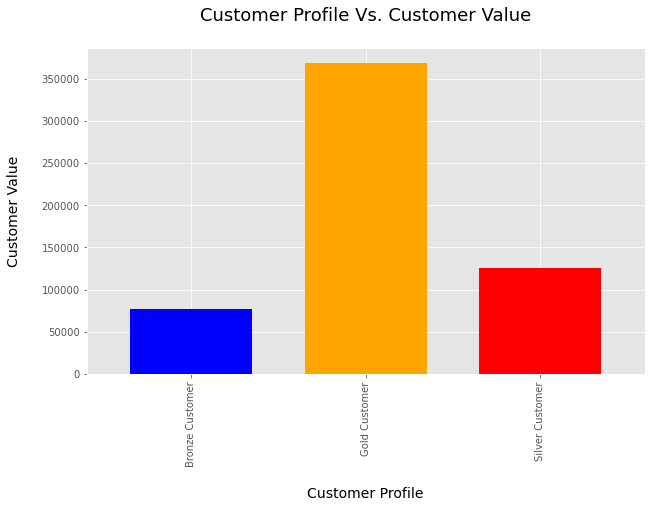

In [127]:
plt.figure(figsize=[10,6])
plt.style.use('ggplot')
plt.title("Customer Profile Vs. Customer Value\n", fontsize=18)

rfmTable.groupby(["Customer_Profile"])["RFM_Value"].sum().plot(kind="bar", width=0.7, color=["blue","orange","red","green"])

plt.xlabel("\nCustomer Profile", fontsize=14,color="black")
plt.ylabel("Customer Value\n",fontsize=14, color="black")

    
plt.show()

### The above bar graph implies that -*

**gold Customer** has a good range of customers.

**gold Customer** has high customer value as compared to other customer profiles.


### Age Cluster to shows which wealth segment brings more profit on the tabel

In [130]:
res1 = pd.pivot_table(data=Transaction_Exciting_Customer, index="age_group", columns="wealth_segment", values="profit",aggfunc=np.sum)
res1

wealth_segment,Affluent Customer,High Net Worth,Mass Customer
age_group,,,
<30,396007.92,335764.77,692526.75
30-40,334178.62,372241.23,681114.78
40-50,626030.45,681495.37,1356499.08
50-60,340137.99,360956.51,676747.74
60+,233502.02,215472.67,449430.01


In [131]:
res1["Affluent Customer"] = res1["Affluent Customer"].astype(int)
res1["High Net Worth"] = res1["High Net Worth"].astype(int)
res1["Mass Customer"] = res1["Mass Customer"].astype(int)

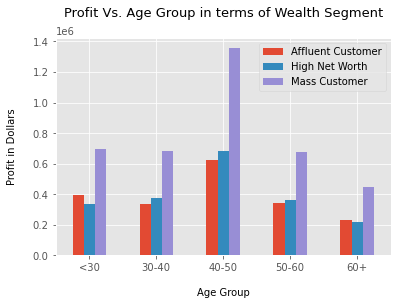

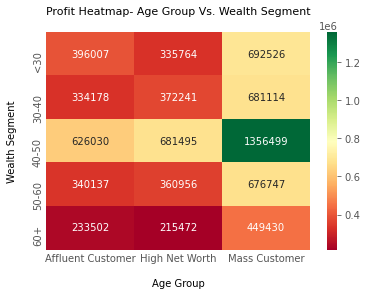

In [133]:
pd.pivot_table(data=Transaction_Exciting_Customer, index="age_group", columns="wealth_segment", values="profit",aggfunc=np.sum).plot(kind='bar')
plt.title("Profit Vs. Age Group in terms of Wealth Segment\n", fontsize=13)
plt.xlabel("\nAge Group", fontsize=10,color="black")
plt.ylabel("Profit in Dollars\n",fontsize=10, color="black")
plt.legend(loc='upper right',fontsize=10)
plt.xticks(rotation=0)

plt.figure(figsize=[13,4])
plt.subplot(1,2,1)

plt.title("Profit Heatmap- Age Group Vs. Wealth Segment\n", fontsize=11)
ax = sns.heatmap(res1, annot=True, cmap="RdYlGn", fmt='d')
ax.tick_params(axis='both', which='both', length=0)
plt.xlabel("\nAge Group", fontsize=10,color="black")
plt.ylabel("Wealth Segment\n",fontsize=10,color="black")
plt.show()

plt.show()

#### From the above heatmap and bar graph

Age Group **40-50** giving the highest profit.

Based on that the wealth segment **Mass Customers** has overall performance better.


## Find number of cars owned as per the location

In [134]:
Transaction_Exciting_Customer.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'profit', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'owns_car', 'Age', 'age_group',
       'wealth_segment', 'postcode', 'state', 'country', 'property_valuation',
       'recency'],
      dtype='object')

In [135]:
Transaction_Exciting_Customer["owns_car"].value_counts()

Yes    7111
No     6943
Name: owns_car, dtype: int64

In [136]:
Transaction_Exciting_Customer["owns_car_flag"]=np.where(Transaction_Exciting_Customer["owns_car"]=="Yes",1,0)

In [137]:
Transaction_Exciting_Customer.groupby(["state","owns_car"])["owns_car_flag"].count()

state            owns_car
New South Wales  No          3647
                 Yes         3791
QLD              No          1555
                 Yes         1555
Victoria         No          1741
                 Yes         1765
Name: owns_car_flag, dtype: int64

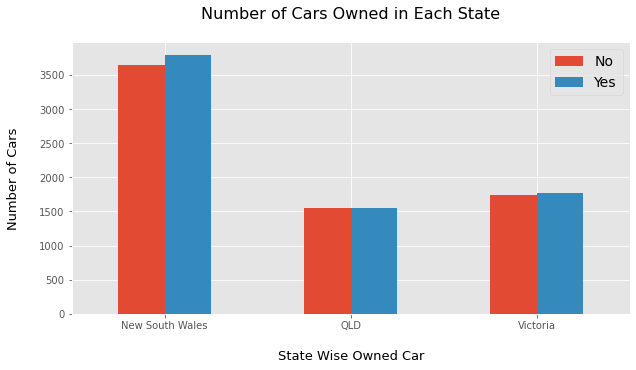

In [138]:
pd.pivot_table(data=Transaction_Exciting_Customer, index="state", columns="owns_car", values="owns_car_flag",aggfunc='count').plot(kind='bar',figsize=[10,5])
plt.title("Number of Cars Owned in Each State\n", fontsize=16)
plt.xlabel("\nState Wise Owned Car", fontsize=13,color="black")
plt.ylabel("Number of Cars\n",fontsize=13, color="black")
plt.legend(loc='upper right',fontsize=14)
plt.xticks(rotation=0)

plt.show()

### From the above bar graph implies

New South Wales holds high number of owned cars as compared to other states of Australia.

## Find total bikes purchased by each customer based on his/her job_industry

In [140]:
Transaction_Exciting_Customer.groupby("job_industry_category")["past_3_years_bike_related_purchases"].count()

job_industry_category
Argiculture            485
Entertainment          625
Financial Services    3341
Health                2733
IT                     584
Manufacturing         3432
Property              1091
Retail                1451
Telecommunications     312
Name: past_3_years_bike_related_purchases, dtype: int64

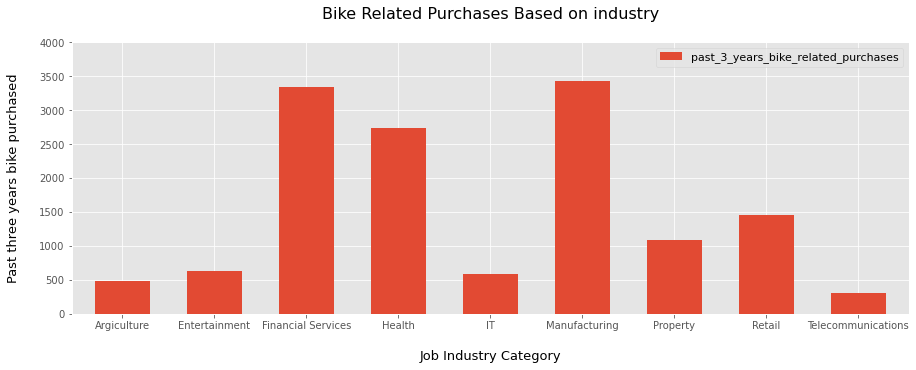

In [141]:
Transaction_Exciting_Customer.groupby("job_industry_category")["past_3_years_bike_related_purchases"].count().plot(kind='bar',figsize=[15,5], width=0.6)
plt.title("Bike Related Purchases Based on industry\n", fontsize=16)
plt.xlabel("\nJob Industry Category", fontsize=13,color="black")
plt.ylabel("Past three years bike purchased\n",fontsize=13, color="black")
plt.xticks(rotation=0)
plt.yticks(np.arange(0,4500,500))

plt.legend(loc='upper right',fontsize=11)


plt.show()

#### From the bar graph

Industry like - **Manufacturing & Financial Services** holds a high record in terms of bike purchased in last 3 years.


## Find which industry sector brings up the highest profit on the tabel

In [142]:
Transaction_Exciting_Customer.groupby("job_industry_category")["profit"].sum().round()

job_industry_category
Argiculture            256388.0
Entertainment          345259.0
Financial Services    1898996.0
Health                1480275.0
IT                     318906.0
Manufacturing         1868154.0
Property               597923.0
Retail                 818723.0
Telecommunications     167483.0
Name: profit, dtype: float64

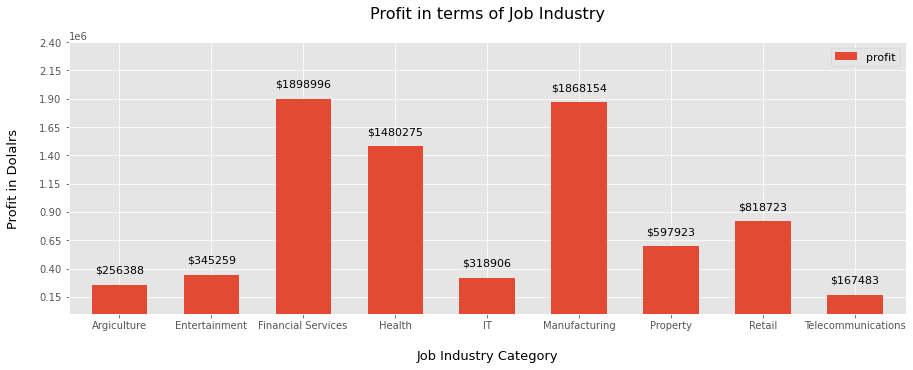

In [144]:
Transaction_Exciting_Customer.groupby("job_industry_category")["profit"].sum().plot(kind='bar',figsize=[15,5], width=0.6)
plt.title("Profit in terms of Job Industry\n", fontsize=16)
plt.xlabel("\nJob Industry Category", fontsize=13,color="black")
plt.ylabel("Profit in Dolalrs\n",fontsize=13, color="black")
plt.xticks(rotation=0)
plt.yticks(np.arange(150000,2500000,250000))
plt.legend(loc='upper right',fontsize=11)

label = Transaction_Exciting_Customer.groupby("job_industry_category")["profit"].sum().round()
for i in range(9):
    plt.text(x = i, y = label[i], s = str("\n"+"$"+str(int(label[i]))+"\n"),horizontalalignment='center',rotation = 360, color = "black", fontsize=11)

plt.show()

### From the bar graph

Industry like - **Manufacturing & Financial Services** holds high profit

## Find past three year bike purchase on the bases of gender and age group

In [146]:
pd.pivot_table(data=Transaction_Exciting_Customer,columns="age_group",index="gender",values= "past_3_years_bike_related_purchases",aggfunc="count")

age_group,<30,30-40,40-50,50-60,60+
gender,,,,,
Female,1280,1248,2536,1235,836
Male,1324,1207,2354,1202,832


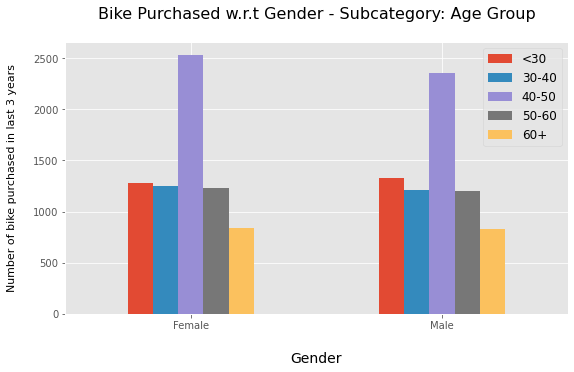

In [147]:
pd.pivot_table(data=Transaction_Exciting_Customer,columns="age_group",index="gender",values= "past_3_years_bike_related_purchases",aggfunc="count").plot(kind="bar",figsize=[9,5])


plt.title("Bike Purchased w.r.t Gender - Subcategory: Age Group\n", fontsize=16)
plt.xlabel("\nGender", fontsize=14,color="black")
plt.ylabel("Number of bike purchased in last 3 years\n",fontsize=11, color="black")
plt.legend(loc='upper right',fontsize=12)
plt.xticks(rotation=0)

plt.show()

### From the above bar graph

Age group **40-50** has high count in terms of bike purchased in last 3 years within that Female ratio a bit higher.



## Dataframe with high value customers

In [148]:
df1 = Transaction_Exciting_Customer[Transaction_Exciting_Customer["age_group"]=="40-50"]
df1.shape

(4890, 28)

In [149]:
df2 = df1[df1["wealth_segment"]=="Mass Customer"]
df2.shape

(2487, 28)

In [150]:
F = df2[df2["job_industry_category"]=="Financial Services"]
F.shape

(498, 28)

In [151]:
M = df2[df2["job_industry_category"]=="Manufacturing"]
M.shape

(616, 28)

In [152]:
H = df2[df2["job_industry_category"] == "Health"]
H.shape

(587, 28)

In [153]:
F = pd.concat([F,M],ignore_index=True,sort=False)
F.shape

(1114, 28)

In [154]:
F = pd.concat([F,H],ignore_index=True,sort=False)
F.shape

(1701, 28)

In [155]:
df_highValue_customers = F
df_highValue_customers.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,owns_car,Age,age_group,wealth_segment,postcode,state,country,property_valuation,recency,owns_car_flag
0,18,33,1842,2017-06-02,0.0,Approved,Giant Bicycles,Standard,medium,small,...,No,44.0,40-50,Mass Customer,2250.0,New South Wales,Australia,8.0,211,0
1,22,37,595,2017-06-29,1.0,Approved,OHM Cycles,Standard,low,medium,...,No,48.0,40-50,Mass Customer,4305.0,QLD,Australia,4.0,184,0
2,41,44,2570,2017-05-08,1.0,Approved,WeareA2B,Standard,medium,medium,...,Yes,44.0,40-50,Mass Customer,4812.0,QLD,Australia,3.0,236,1
3,95,45,757,2017-02-26,0.0,Approved,Solex,Standard,medium,medium,...,No,44.0,40-50,Mass Customer,4019.0,QLD,Australia,8.0,307,0
4,104,78,1468,2017-09-12,0.0,Approved,Giant Bicycles,Standard,medium,large,...,No,43.0,40-50,Mass Customer,2519.0,New South Wales,Australia,9.0,109,0
